In [2]:
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

dataRep = '../data/'
datasetRep = '../data/dataset/'
trainImageRep = '../data/train_images/'
scriptRep = '../'

#Import the scripts
import sys
sys.path.insert(1, os.path.abspath(scriptRep))
import kuzushiji_recognition as kr

unicodeData = pd.read_csv(dataRep+'unicode_translation.csv')
trainData = pd.read_csv(dataRep+'train.csv')
sampleSubData = pd.read_csv(dataRep+'sample_submission.csv')

In [3]:
#Parameters Cell

nbImageTrain = 100
xpixel = 512
ypixel = 512
minSize=32
fill_color=(255, 255, 255)

In [5]:
kr.createDatasetFirstNetwork(dataRep+'train.csv', datasetRep + 'SegmentationMapsFull.npz', unicodeData, xpixel = 512, 
                             ypixel = 512, gray=True)

Creating segmentation maps and converting train images


100%|██████████████████████████████████████████████████████████████████████████████| 3881/3881 [23:00<00:00,  2.81it/s]


In [4]:
raw = np.load(datasetRep + 'SegmentationMapsFull.npz')

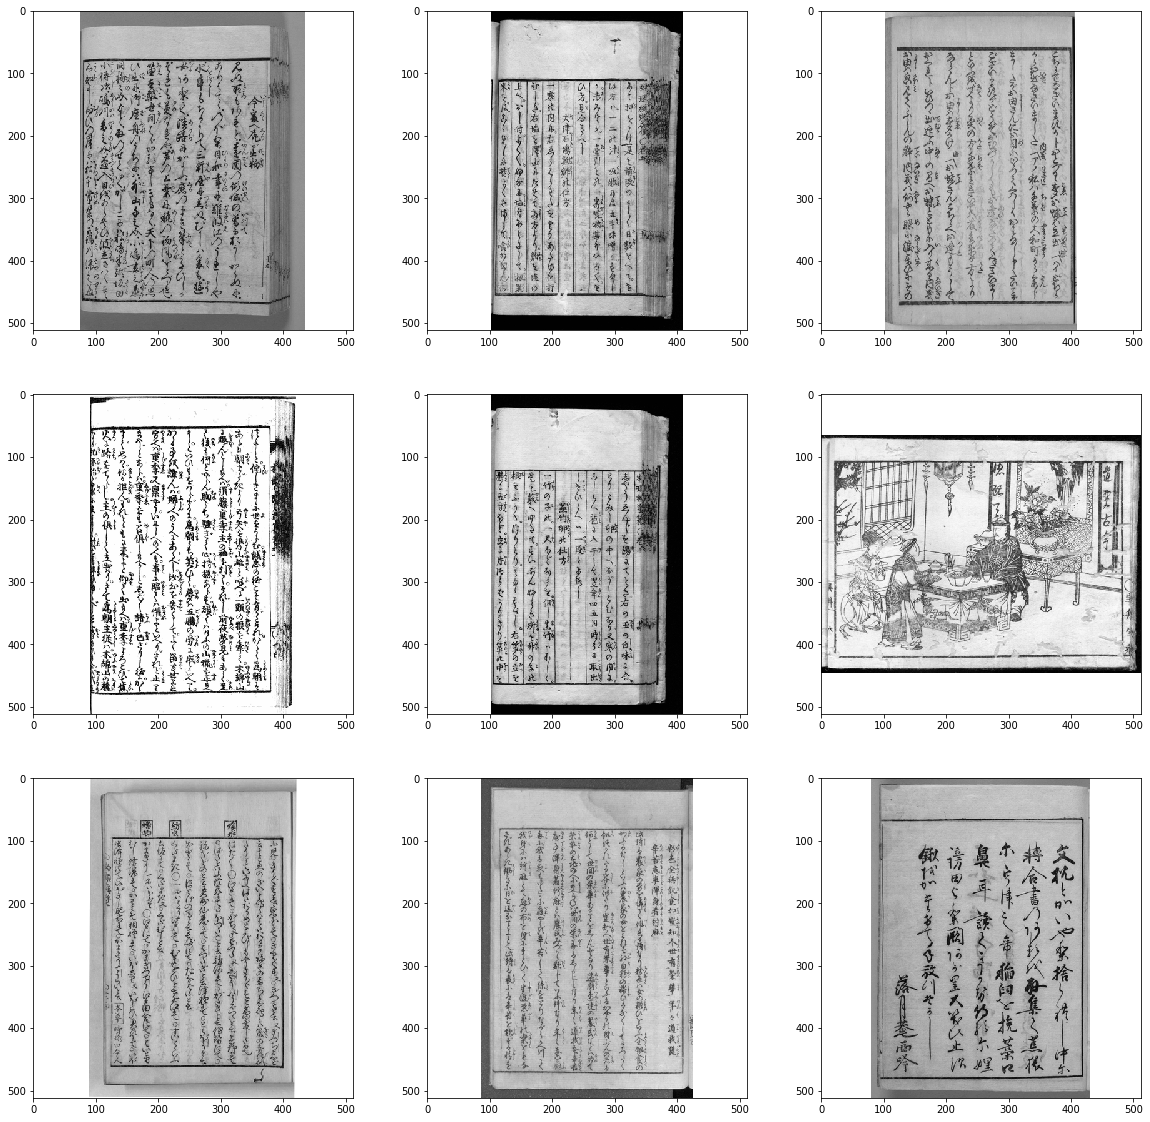

In [5]:
nDisp = 3
imageId = np.random.randint(raw['compressed_images'].shape[0], size=(nDisp, nDisp))

plt.figure(figsize=(20,20))
for i in range(nDisp):
    for j in range(nDisp):
        plt.subplot(nDisp, nDisp, i*nDisp+j+1)
        plt.imshow(raw['compressed_images'][imageId[i,j],:,:,0], cmap='gist_gray')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

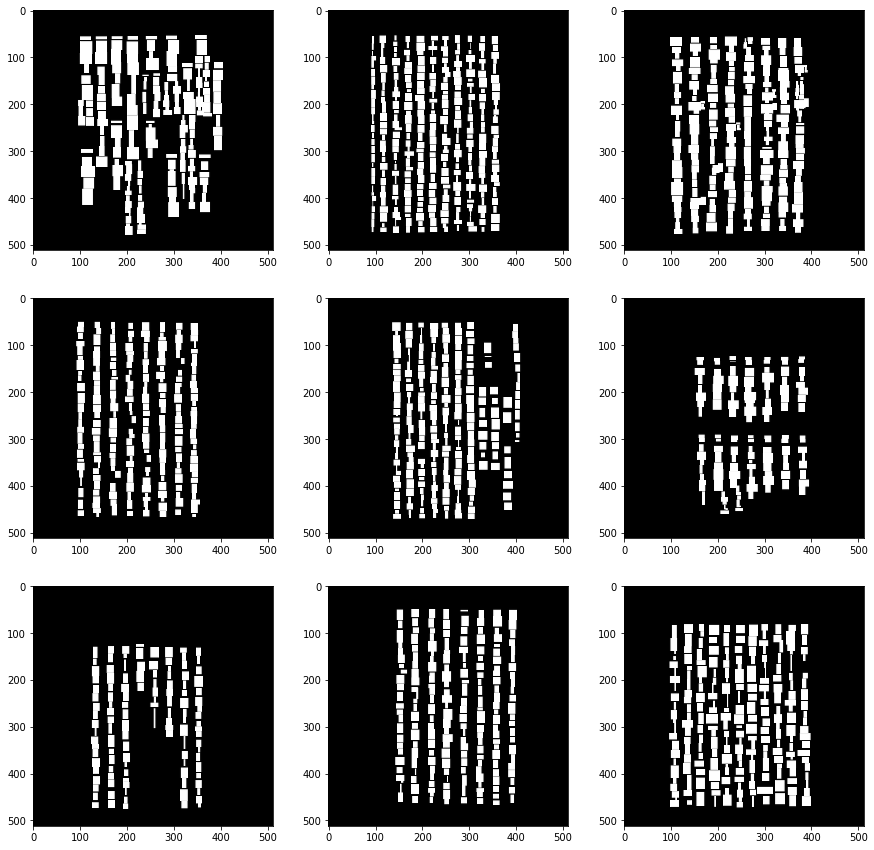

In [6]:
nDisp = 3
imageId = np.random.randint(raw['maps'].shape[0], size=(nDisp, nDisp))

plt.figure(figsize=(15,15))
for i in range(nDisp):
    for j in range(nDisp):
        plt.subplot(nDisp, nDisp, i*nDisp+j+1)
        plt.imshow(raw['maps'][imageId[i,j],:,:,0], cmap='gist_gray')
plt.show()


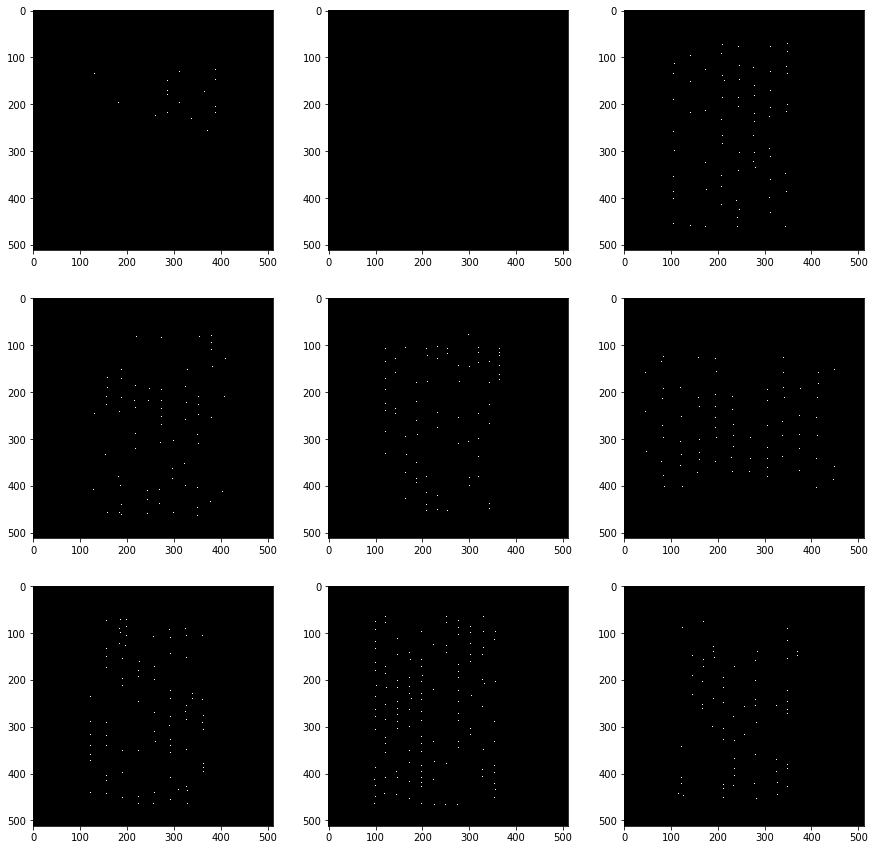

In [7]:
nDisp = 3
imageId = np.random.randint(raw['maps'].shape[0], size=(nDisp, nDisp))

plt.figure(figsize=(15,15))
for i in range(nDisp):
    for j in range(nDisp):
        plt.subplot(nDisp, nDisp, i*nDisp+j+1)
        plt.imshow(raw['maps'][imageId[i,j],:,:,1], cmap='gist_gray')
plt.show()

In [ ]:
#Creation of the dataset

imagesId = trainData.image_id.tolist()
labels = trainData.labels.tolist()
poulpe = list(zip(imagesId,labels))
#print(imagesId)
imageTrain = random.choices(poulpe, weights=None, cum_weights=None, k=nbImageTrain)
trainImagesId, trainLabel = list(zip(*imageTrain))
#print(trainImagesId[0])

In [ ]:
imgSeg3 = Image.new('L', (xpixel, ypixel), 255)
plt.imshow(imgSeg3,cmap='bone',vmin=0, vmax=255)

In [ ]:
unicodeData = pd.read_csv(dataRep+'unicode_translation.csv')
kr.createCaracDatabase(trainLabel[0], unicodeData)

In [ ]:
dB1

In [ ]:
dB2

In [ ]:
dB

In [ ]:
cSegMap1 = kr.convertImage(Image.fromarray(segMap1), xpixel, ypixel, gray=True, squared=True)
cSegMap2 = kr.convertImage(Image.fromarray(segMap2), xpixel, ypixel, gray=True, squared=True)
cSegMap1 = np.array(cSegMap1)
cSegMap2 = np.array(cSegMap2)

In [ ]:
cSegMap1 = np.delete(np.delete(np.array(cSegMap1), 0, axis=2), 0, axis=2)
cSegMap2 = np.delete(np.delete(np.array(cSegMap2), 0, axis=2), 0, axis=2)
cSegMap = np.swapaxes(np.swapaxes(np.array([cSegMap1,cSegMap2],dtype=np.uint8), 0, 2), 2, 3)
print(cSegMap.shape)

In [ ]:
plt.hist(cSegMapCenter.flatten(), 256, facecolor='blue', True)
plt.show()
cSegMapCenter = np.where(cSegMapCenter<10, 0, 255)
plt.hist(cSegMapCenter.flatten(), 256, facecolor='blue', True)
plt.show()
fig, ax = plt.subplots(2,1, figsize=(20,20))
ax1, ax2 = ax.ravel()
ax1.imshow(Im)
ax2.imshow(cSegMapCenter)
plt.tight_layout()